In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy as sc
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)
penguins_final

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
261,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
262,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
263,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
penguins.shape

(344, 7)

## Exploratory Data Analysis

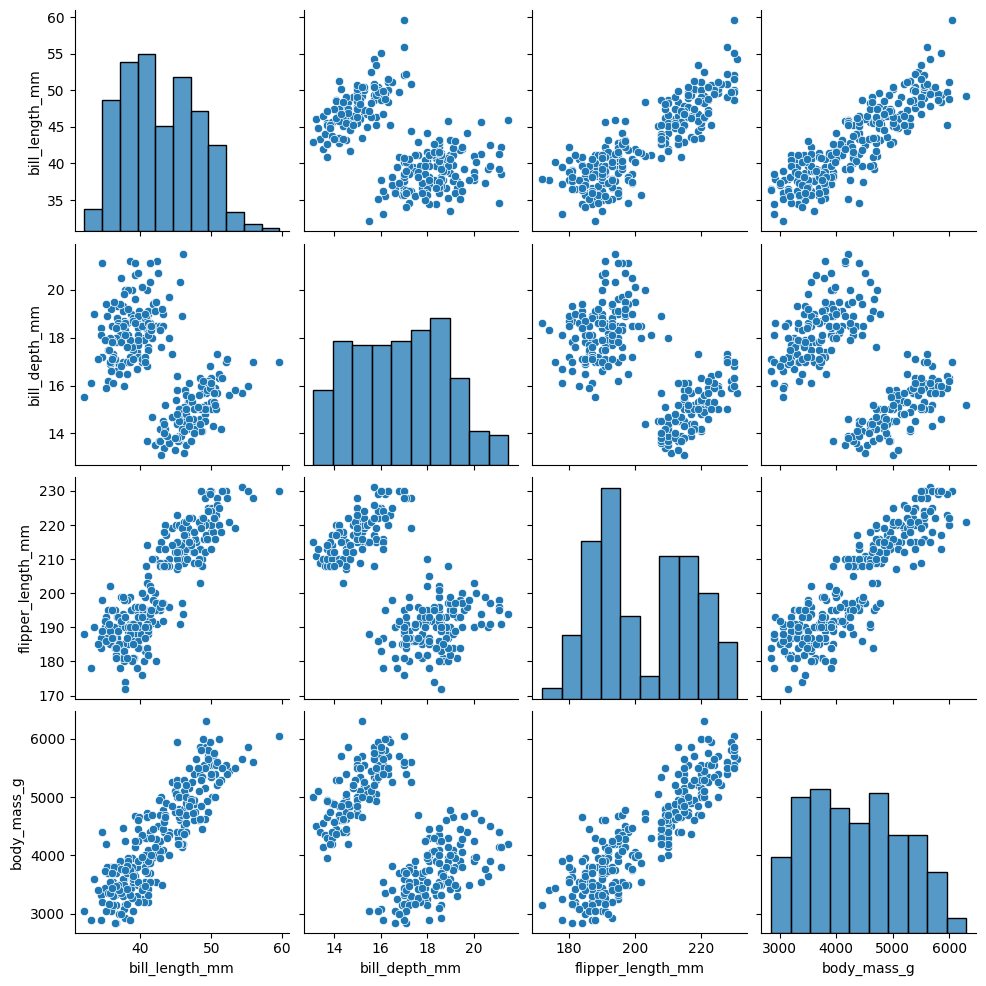

In [6]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships:

- bill length (mm) and flipper length (mm)
- bill length (mm) and body mass (g)
- flipper length (mm) and body mass (g)

/var/folders/l9/xtt61d010kb31nzhnc58p51h0000gn/T/ipykernel_2298/351808776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cmat = penguins_final.corr(method="pearson")


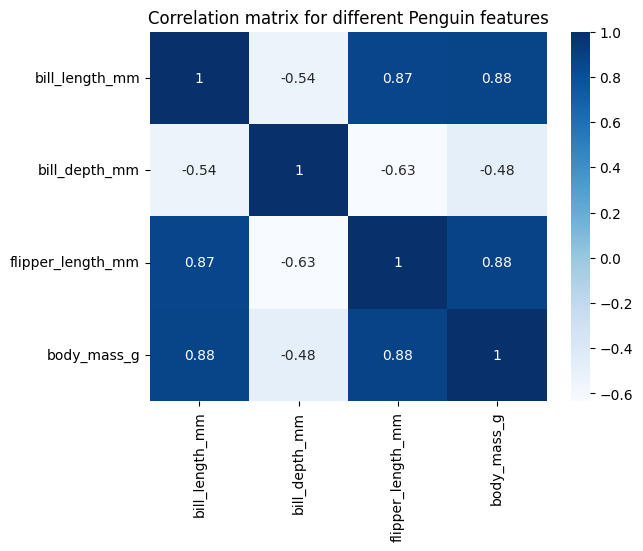

In [7]:
cmat = penguins_final.corr(method="pearson")
sns.heatmap(cmat, annot = True, cmap="Blues")
plt.title('Correlation matrix for different Penguin features')
plt.show()

## Model Construction

## bill length (mm) and body mass (g)

In [6]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]
# Write out SLR formula
ols_formula = "body_mass_g ~ bill_length_mm"
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Thu, 25 May 2023   Prob (F-statistic):           1.33e-85
Time:                        13:12:47   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Takeaways

* According to the simple linear regression model we built, $\hat{\beta_1}$ is 141.1904. So for every one-millimeter increase in the bill length of a penguin, we would expect a penguin to have about 141.1904 more grams in body mass. 

* The estimate has a p-value of 0.000, which is less than 0.05, meaning that the coefficient is “statistically significant”, which means that a difference in bill length of a penguin is truly correlated with a difference in body mass. 

* The estimate has a 95% confidence interval of 131.788 and 150.592.

* R squared = 0.769, which means that bill length explains about 77% of the variance in body mass.

<AxesSubplot: xlabel='bill_length_mm', ylabel='body_mass_g'>

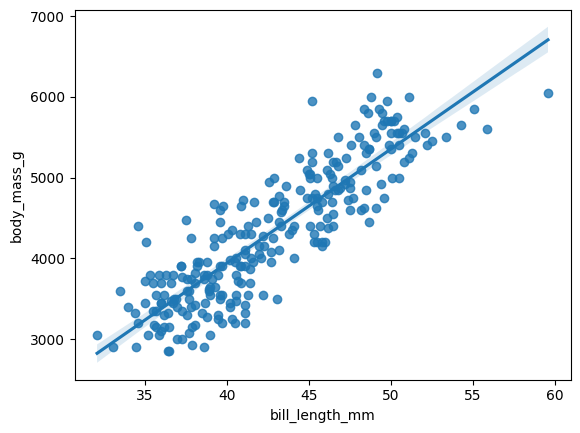

In [16]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

## Checking SLR Model Assumptions

There are four main model assumptions for simple linear regression, in no particular order:
1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

We already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, we can only check these assumptions after we have constructed the model. To check these assumptions, we will check the residuals, as an approximation of the errors.

In [17]:
# Subset X variable
X = ols_data["bill_length_mm"]
# Get predictions from model
fitted_values = model.predict(X)
# Calculate residuals
residuals = model.resid

## Normality Assumption

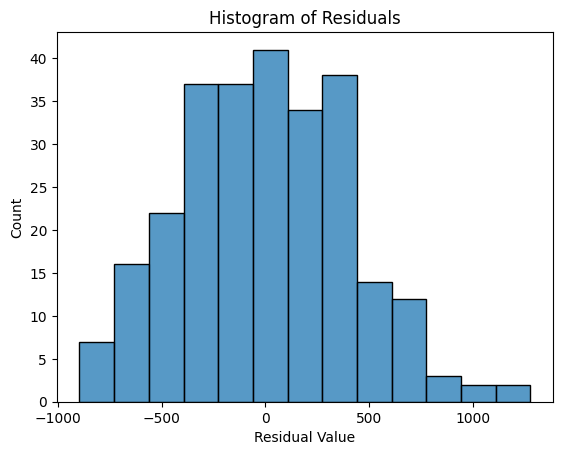

In [18]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. If the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. 

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

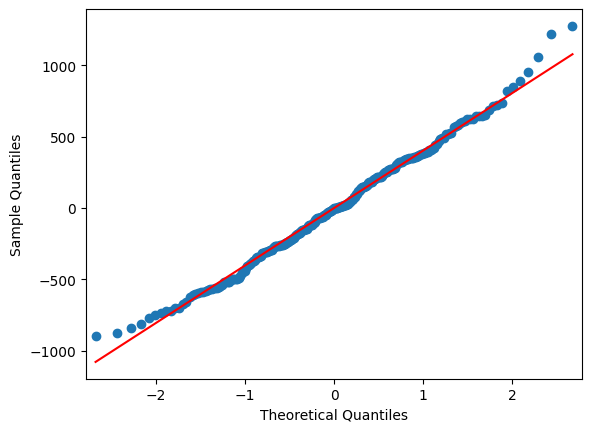

In [19]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

## Homoscedasticity assumption

To check the homoscedasticity assumption, we can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

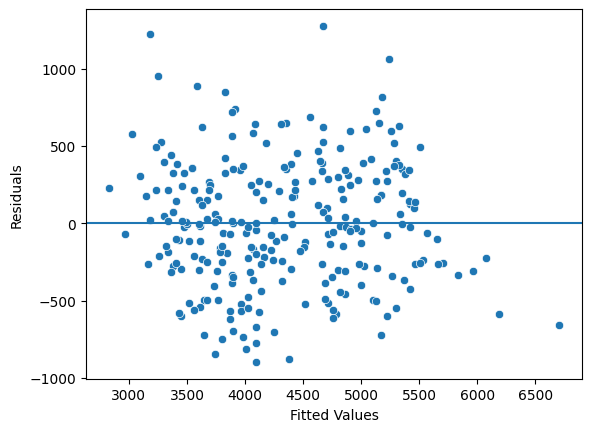

In [20]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
# Add reference line at residuals = 0
fig.axhline(0)
# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
# Show the plot
plt.show()

## flipper length (mm) and body mass (g)

In [21]:
# Subset Data
ols_data = penguins_final[["flipper_length_mm", "body_mass_g"]]
# Write out SLR formula
ols_formula = "body_mass_g ~ flipper_length_mm"
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     944.6
Date:                Thu, 25 May 2023   Prob (F-statistic):           4.97e-89
Time:                        11:26:24   Log-Likelihood:                -1957.8
No. Observations:                 265   AIC:                             3920.
Df Residuals:                     263   BIC:                             3927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5674.5310    326.367    -17.387      0.000   -6317.156   -5031.906
flipper_length_mm    49.4506      1.609     30.734      0.000      46.283      52.619
==============================================================================
Omnibus:                        3.880   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.932
Skew:                           0.292   Prob(JB):                        0.140
Kurtosis:                       2.881   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Takeaways

* According to the simple linear regression model we built, $\hat{\beta_1}$ is 49.4506. So for every one-millimeter increase in the flipper length of a penguin, we would expect a penguin to have about 49.4506 more grams in body mass.
* The estimate has a p-value of 0.000, which is less than 0.05, meaning that the coefficient is “statistically significant”, which means that a difference in flipper length of a penguin is truly correlated with a difference in body mass. 
* The estimate has a 95% confidence interval of 46.283 and 52.619.
* R squared = 0.782, which means that bill length explains about 78% of the variance in body mass.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

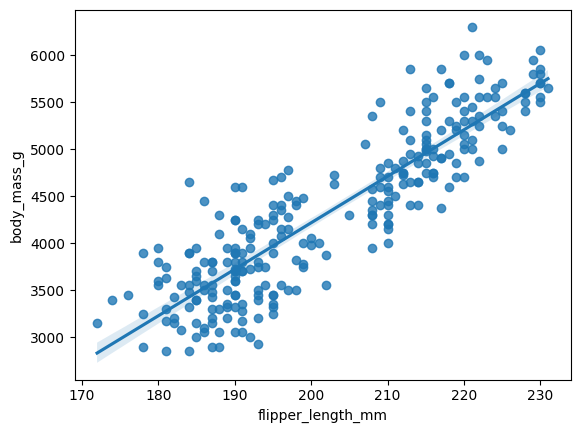

In [23]:
sns.regplot(x = "flipper_length_mm", y = "body_mass_g", data = ols_data)

In [24]:
# Subset X variable
X = ols_data["flipper_length_mm"]
# Get predictions from model
fitted_values = model.predict(X)
# Calculate residuals
residuals = model.resid

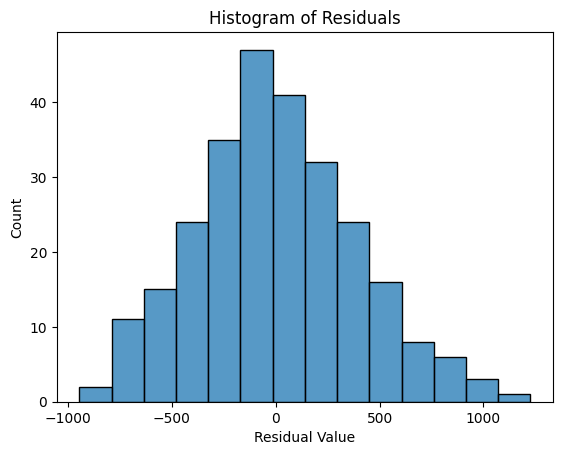

In [25]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

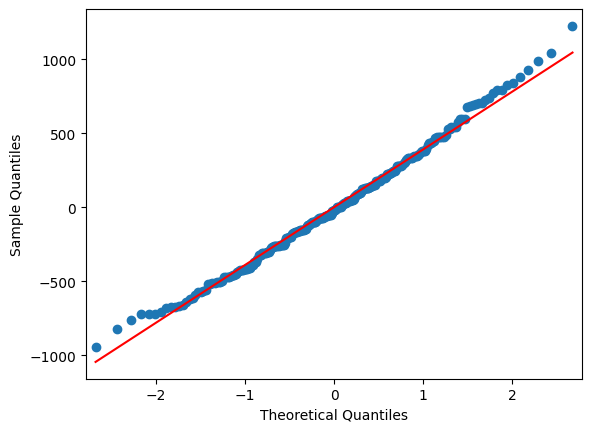

In [26]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

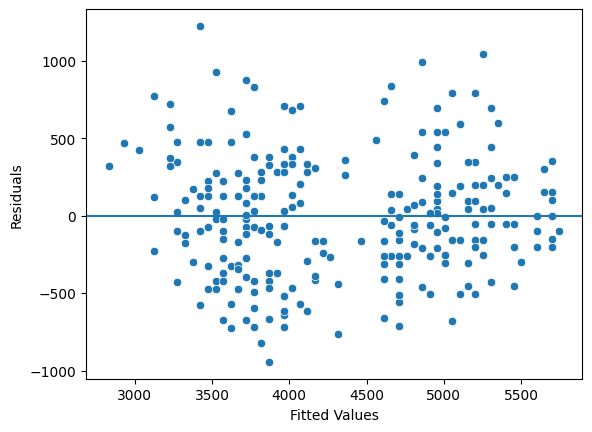

In [27]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
# Add reference line at residuals = 0
fig.axhline(0)
# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
# Show the plot
plt.show()

## bill length (mm) and flipper length (mm)

In [28]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "flipper_length_mm"]]
# Write out SLR formula
ols_formula = "flipper_length_mm ~ bill_length_mm"
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     821.0
Date:                Thu, 25 May 2023   Prob (F-statistic):           7.40e-83
Time:                        11:29:38   Log-Likelihood:                -905.83
No. Observations:                 265   AIC:                             1816.
Df Residuals:                     263   BIC:                             1823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         95.1347      3.767     25.253      0.000      87.717     102.552
bill_length_mm     2.5064      0.087     28.653      0.000       2.334       2.679
==============================================================================
Omnibus:                        3.988   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.041
Skew:                          -0.297   Prob(JB):                        0.133
Kurtosis:                       2.883   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Takeaways

* According to the simple linear regression model we built, $\hat{\beta_1}$ is 2.5064. So for every one-millimeter increase in the flipper length of a penguin, we would expect a penguin to have about 2.5064 more millimeters in bill length. 
* The estimate has a p-value of 0.000, which is less than 0.05, meaning that the coefficient is “statistically significant”, which means that a difference in flipper length of a penguin is truly correlated with a difference in bill length. 
* The estimate has a 95% confidence interval of 2.334 and 2.679.
* R squared = 0.757, which means that bill length explains about 76% of the variance in flipper length.

<AxesSubplot: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

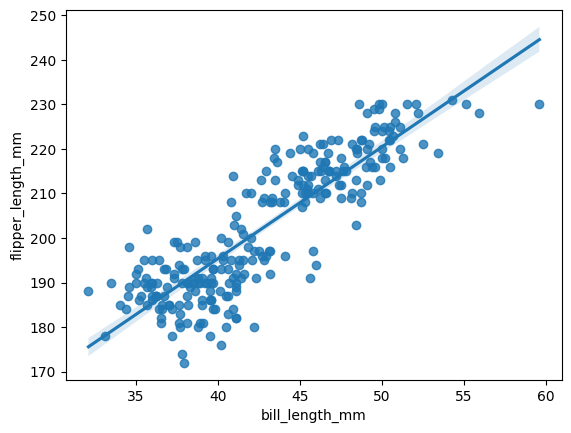

In [29]:
sns.regplot(x = "bill_length_mm", y = "flipper_length_mm", data = ols_data)

In [31]:
# Subset X variable
X = ols_data["bill_length_mm"]
# Get predictions from model
fitted_values = model.predict(X)
# Calculate residuals
residuals = model.resid

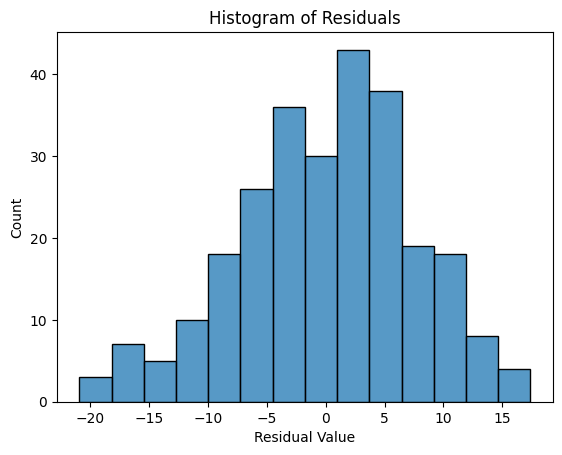

In [32]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

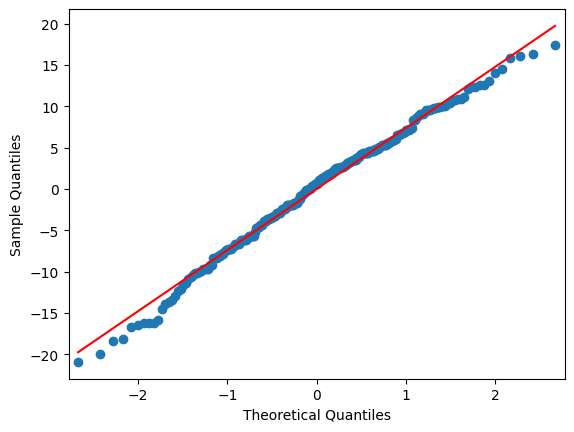

In [33]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

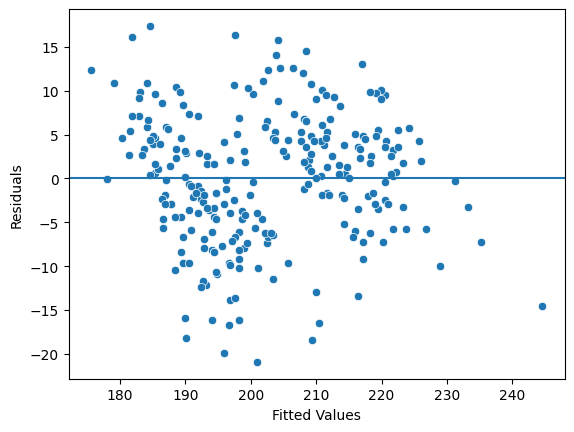

In [34]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
# Add reference line at residuals = 0
fig.axhline(0)
# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
# Show the plot
plt.show()